<a href="https://colab.research.google.com/github/Debasmita-Pal/Code_With_Python/blob/main/DL_ASS2_QS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

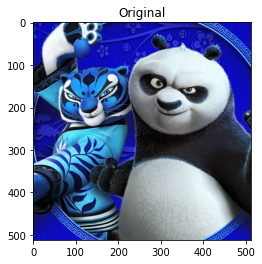

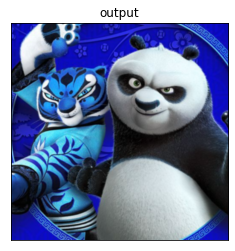

Entropy: 7.757865190612458


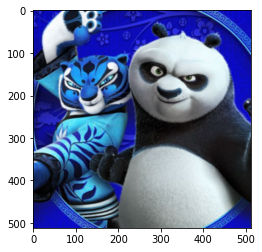

In [60]:

#  REG NO: 20MAI0018


# Box_filter of 3*3 size used to blur the image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.measure

img = cv2.imread('/content/drive/My Drive/panda1.jpg')
kernel=np.ones((3,3),np.float32)/9              
dst=cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', img)
plt.xticks([]), plt.yticks([])
plt.imshow(dst),plt.title('output')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('boxfil.png', dst)

plt.imshow(dst)
entropy = skimage.measure.shannon_entropy(dst)
print("Entropy:",entropy)

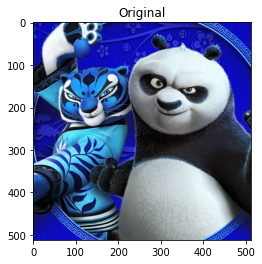

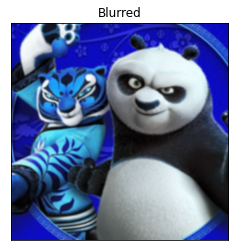

Entropy: 7.753779083992836


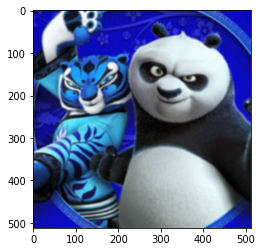

In [61]:
# Box_filter of 5*5 size used to blur the image
blur = cv2.blur(img,(5,5))

plt.imshow(img),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', img)
plt.xticks([]), plt.yticks([])
plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('boxfil.png', blur)

plt.imshow(blur)
entropy = skimage.measure.shannon_entropy(blur)
print("Entropy:",entropy)

image matrix size:  (512, 512)

 First 5 columns and rows of the image matrix: 
 [[64 63 60 60 72]
 [62 63 62 58 72]
 [62 61 64 55 65]
 [66 58 64 54 54]
 [70 55 64 57 49]]


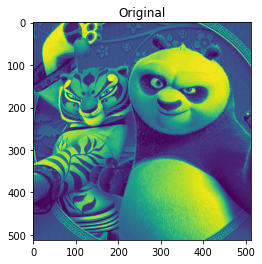

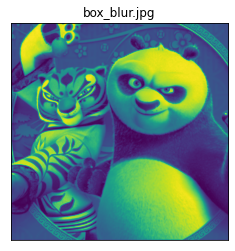

Entropy: 7.8138111329405024


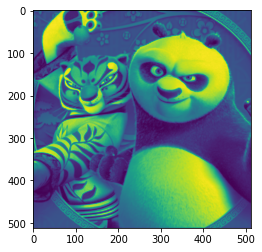

In [62]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.measure

IMAGES_PATH = '/content/drive/My Drive/panda1.jpg'

def load_image(image_path):
    # Create the Image directory to save any plots
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    coloured_image = cv2.imread('/content/drive/My Drive/panda1.jpg')
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    # cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image


def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.
    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

input_image = load_image('/content/drive/My Drive/panda1.jpg')


# kernel (3*3) to be used for box blur
imageboxblur = convolve2d(input_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite(IMAGES_PATH + 'box_blur.jpg', imageboxblur)
plt.imshow(input_image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', input_image)
plt.xticks([]), plt.yticks([])
plt.imshow(imageboxblur),plt.title('box_blur.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('box_blur.jpg', imageboxblur)

plt.imshow(imageboxblur)
entropy = skimage.measure.shannon_entropy(imageboxblur)
print("Entropy:",entropy)



[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 64. ... 63.  0.  0.]
 ...
 [ 0.  0. 65. ... 64.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


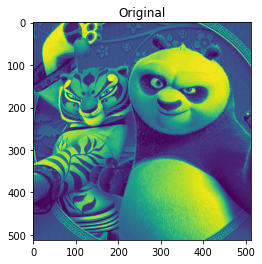

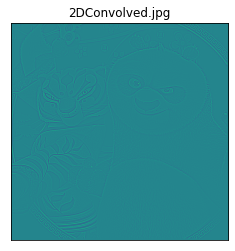

Entropy: 7.983912153982938


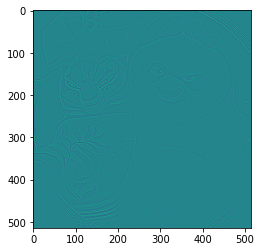

In [63]:
#zero padding and stride=1
import cv2 
import numpy as np
import skimage.measure


def processImage(image): 
  image = cv2.imread('/content/drive/My Drive/panda1.jpg') 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/My Drive/panda1.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)   
plt.imshow(image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', image)
plt.xticks([]), plt.yticks([])
plt.imshow(output),plt.title('2DConvolved.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('2DConvolved.jpg', output)  

plt.imshow(output)
entropy = skimage.measure.shannon_entropy(output)
print("Entropy:",entropy)


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 64. ... 63.  0.  0.]
 ...
 [ 0.  0. 65. ... 64.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


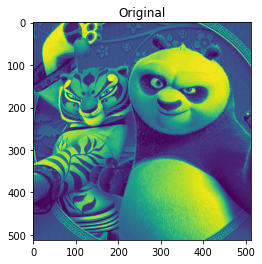

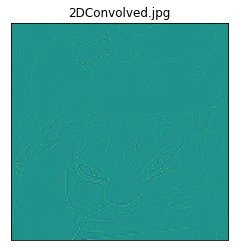

Entropy: 2.8101238962092334


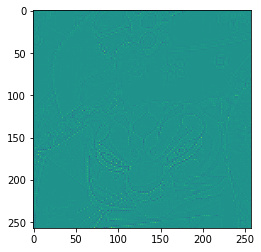

In [64]:
#zero padding and stride=2
import cv2 
import numpy as np
import skimage.measure

def processImage(image): 
  image = cv2.imread('/content/drive/My Drive/panda1.jpg') 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

def convolve2D(image, kernel, padding=0, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/My Drive/panda1.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)   
plt.imshow(image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', image)
plt.xticks([]), plt.yticks([])
plt.imshow(output),plt.title('2DConvolved.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('2DConvolved.jpg', output)  

plt.imshow(output)
entropy = skimage.measure.shannon_entropy(output)
print("Entropy:",entropy)